In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mplDates
import seaborn as sb
import os

sb.set()

#### Analysing the impacts of Covid-19 Globally

In [125]:
df = pd.read_csv(r"D:\Open Classroom\Data Files\global economy - Impact COVID19\transformed_data.csv")
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [126]:
df.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


In [127]:
df.shape

(50418, 9)

In [128]:
df.dropna(axis = "index", how = "any")
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [129]:
df.shape

(50418, 9)

In [130]:
hdi = df.groupby("COUNTRY").agg({"HDI": "sum"})
hdi.sort_values(by = "HDI", ascending = False).head(10)
hdi.reset_index()

,COUNTRY,HDI
0,Afghanistan,146.412
1,Albania,176.625
2,Algeria,221.676
3,Andorra,193.908
4,Angola,123.172
...,...,...
205,Venezuela,166.659
206,Vietnam,204.036
207,Yemen,87.236
208,Zambia,126.420


In [131]:
country = [state for state, df in df.groupby("COUNTRY")]
#plt.figure(figsize = (10, 6))
#plt.bar(country, hdi["HDI"])
#plt.xticks(country, rotation = "vertical")
#plt.show()

In [148]:
cases_per_state = df.groupby("COUNTRY").agg({"TC": "sum"})
cases_per_state.sort_values(by = "TC", ascending = False).head(15)

,TC
COUNTRY,
United States,3343.050755
China,3128.587021
Brazil,2913.256895
Italy,2873.314489
Spain,2843.820343
India,2825.623737
United Kingdom,2809.857646
Germany,2804.510066
Iran,2803.718251


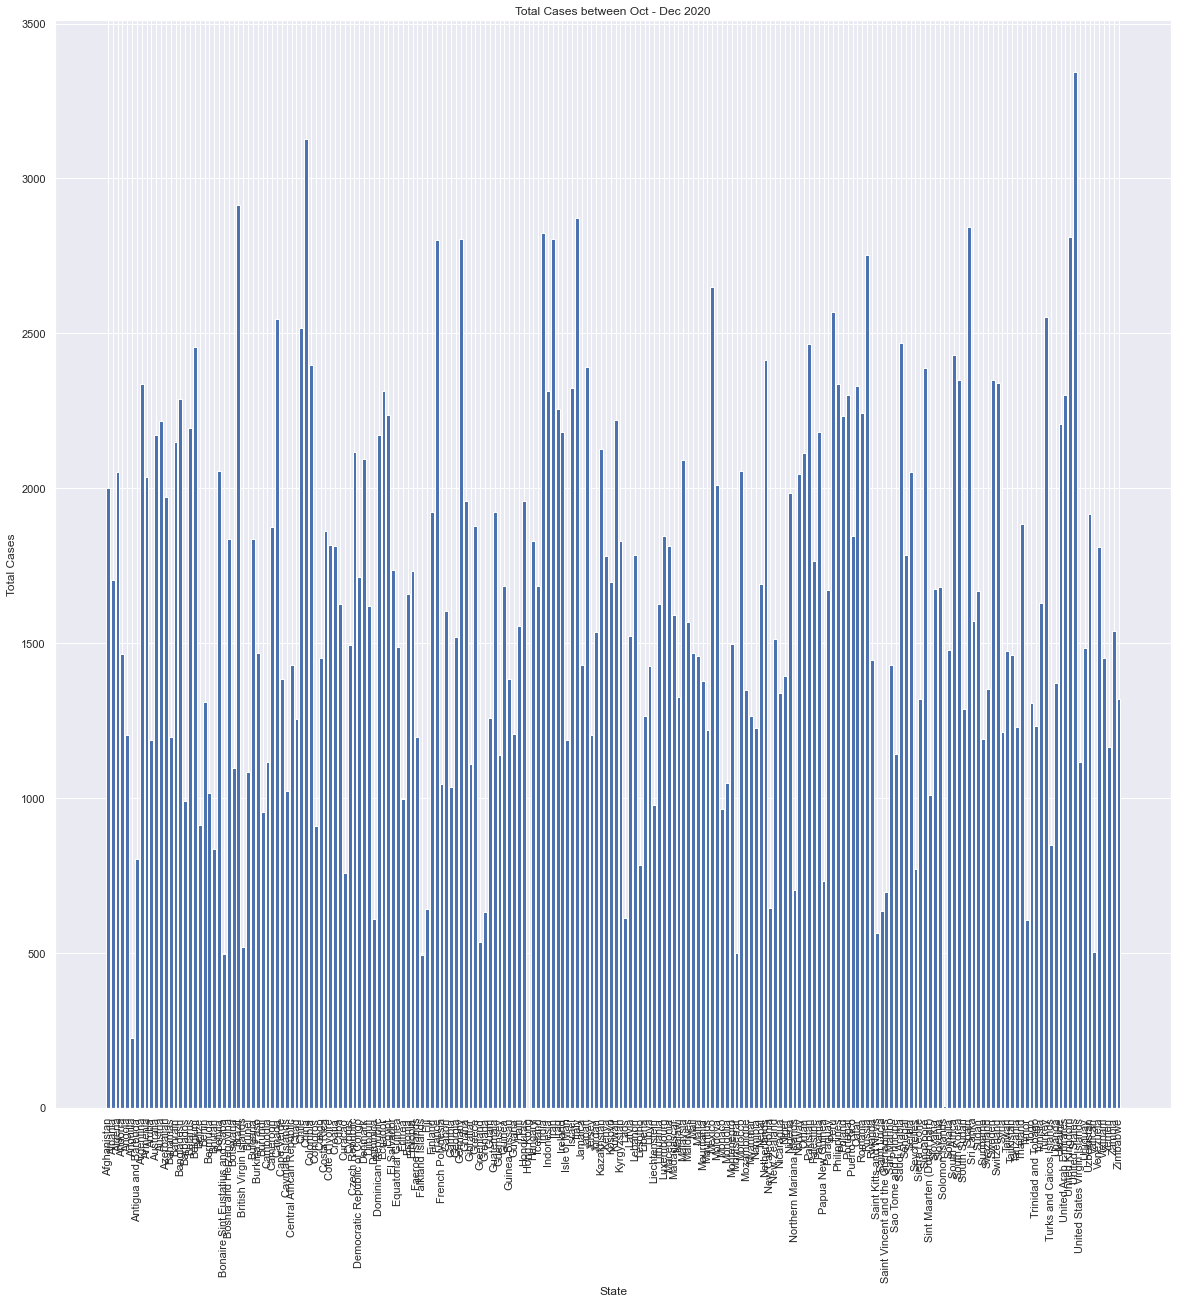

In [151]:
country = [i for i, df in df.groupby("COUNTRY")]

plt.figure(figsize = (20,20))
plt.bar(country, cases_per_state["TC"])
plt.xticks(country, rotation = "vertical")
plt.xlabel("State")
plt.ylabel("Total Cases")
plt.title("Total Cases between Oct - Dec 2020")
plt.show()

In [133]:
deaths_per_state = df.groupby("COUNTRY").agg({"TD":"sum"})
deaths_per_state.sort_values(by = "TD", ascending = False)

,TD
COUNTRY,
United States,2480.576064
Italy,2327.710204
United Kingdom,2209.519314
China,2205.740166
France,2203.766710
...,...
Dominica,0.000000
Seychelles,0.000000
Mongolia,0.000000


In [134]:
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [135]:
pop = df.groupby("COUNTRY").agg({"POP": "mean"})
pop.sort_values(by = "POP", ascending = False)

,POP
COUNTRY,
China,21.087439
India,21.045353
United States,19.617637
Indonesia,19.426899
Pakistan,19.213186
...,...
Bonaire Sint Eustatius and Saba,10.174316
Anguilla,9.615939
Montserrat,8.516993


In [152]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.loc[0, "DATE"]

df["DAY"] = df["DATE"].dt.day_name()
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,DAY
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754,Tuesday
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,Wednesday
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,Thursday
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,Friday
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754,Saturday


In [137]:
cases_by_day = df.groupby("DAY").agg({"TC": "sum"})
cases_by_day.sort_values(by = "DAY", ascending = False)

,TC
DAY,
Wednesday,48145.370635
Tuesday,47841.026278
Thursday,48425.488590
Sunday,49252.586457
Saturday,49010.067137
Monday,49521.150624
Friday,48737.118490


In [140]:
deaths_per_day = df.groupby("DAY").agg({"TD": "sum"})
deaths_per_day.sort_values(by = "TD", ascending = False)

,TD
DAY,
Monday,25027.201828
Sunday,24888.021280
Saturday,24744.496171
Friday,24598.617053
Thursday,24437.685393
Wednesday,24288.111185
Tuesday,24126.813627


TypeError: only size-1 arrays can be converted to Python scalars

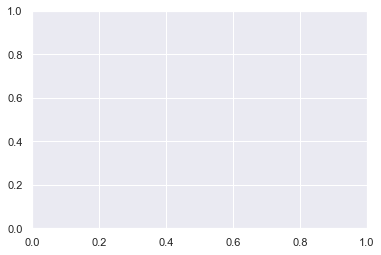

In [141]:

plt.bar(deaths_per_day, deaths_per_day["TD"])
plt.show()

In [139]:
gdp = df.groupby("COUNTRY").agg({"GDPCAP": "mean"})
gdp

,GDPCAP
COUNTRY,
Afghanistan,7.497754
Albania,9.376146
Algeria,9.540639
Andorra,0.000000
Angola,8.668969
...,...
Venezuela,9.725856
Vietnam,8.727759
Yemen,7.299221


In [143]:
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,DAY
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754,Tuesday
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,Wednesday
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,Thursday
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,Friday
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754,Saturday


In [144]:
df["DATE"].max()

Timestamp('2020-10-19 00:00:00')

In [163]:
df["DATE"].min()

Timestamp('2019-12-31 00:00:00')

In [179]:
df.set_index(df["DATE"], inplace = True)
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,DAY
DATE,,,,,,,,,,
2019-12-31,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754,Tuesday
2020-01-01,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,Wednesday
2020-01-02,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,Thursday
2020-01-03,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,Friday
2020-01-04,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754,Saturday


In [186]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.loc[df.index[df["DATE"]==1]]

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,DAY
DATE,,,,,,,,,,


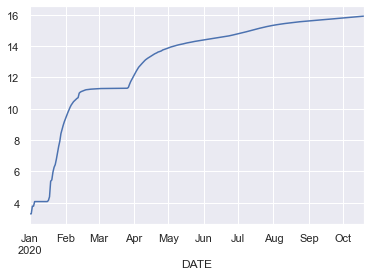

In [197]:
max_cases = df["TC"].resample("d").max().plot()
max_cases

## Human Development Index
##### The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The HDI can also be used to question national policy choices, asking how two countries with the same level of GNI per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities. The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.